All you need is a single neuron with no activation function to fit a linear regression line. The activation function is the identity function here. 


Now if you don't change this activation function such that instead of the identity function, you are to use the softmax function that will help you perform linear classification with one neuron. 


Let's say you're performing binary classification. The softmax function will output probabilities for each of the categories at its output. 


Let's say the values were true or false, the softmax function will output a probability for Y = True and Y = False, and the label with the higher probability is the predicted label from our model.


In the case of binary classification where you have just two output categories, under the hood, the softmax function will apply the logistic regulation formula. This fits an S curve on the data, and it outputs two probabilities, a probability score corresponding to each of our output classes. 


Now the softmax function can be generalized to N-category classification. Let's say for digit classification, you have N classes at the output. Digits can be from 0 through 9. The softmax function can be used for all 10 categories. 


Just like regression, classification is also an optimization problem, and the objective function, or the last function that you use for classifiers, is the cross-entropy loss.


A classifier outputs probabilities, so the output of a classifier is a probability distribution, and this cross- entropy loss is a measure of the distance between two probability distributions. 


Let's say you have actual values in your training data and predicted values from the model. There are two distributions here on screen corresponding to Y actual and Y predicted. 


Now if you were to overlay them, observe that these two labels are in sync, actual labels and predicted labels. This is what low cross entropy implies. 


If the distance here between actual and predicted probability distributions is very small. That is low cross entropy. 

If you were to overlay them, and observe that the labels of the two series are out of sync. This is high cross entropy. 


The objective function of a classification model is to minimize the cross entropy between actual values and predicted values from the model.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

build a classification model that's able to detect spine abnormalities, and the dataset that we'll use is this lower back pain symptom dataset available here at kaggle. This is a dataset of patients, and there are a number of characteristics available about the spine of individual patients. This is spine data. 

Columns are characteristics of the spine, pelvic slope, direct tilt, and so on.

In [51]:
spine_data = pd.read_csv('../datasets/spine_data.csv',
                        skiprows=1,
                        names = ['pelvic_incidence',
                                  'pelvic_tilt',
                                  'lumbar_lordosis_angle',
                                  'sacral_slope',
                                  'pelvic_radius',
                                  'degree_spondylolisthesia',
                                  'pelvic_slope',
                                  'direct_tilt',
                                  'thorasic_slope',
                                  'cervical_slit',
                                  'sacrum_angle',
                                  'scoliosis_angle',
                                  'classs'])

In [52]:
spine_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesia,pelvic_slope,direct_tilt,thorasic_slope,cervical_slit,sacrum_angle,scoliosis_angle,classs
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


You can see that the columns in this dataset describe the characteristics of the spine of an individual, and at the very end, we have a class column which tells us whether this is normal or abnormal.

In [53]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [54]:
spine_data.shape

(310, 13)

In [55]:
spine_data.classs.unique()

array(['Abnormal', 'Normal'], dtype=object)

In [56]:
RANDOM_SEED = 11

In [57]:
spine_data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesia    float64
pelvic_slope                float64
direct_tilt                 float64
thorasic_slope              float64
cervical_slit               float64
sacrum_angle                float64
scoliosis_angle             float64
classs                       object
dtype: object

In [58]:
spine_data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesia    0
pelvic_slope                0
direct_tilt                 0
thorasic_slope              0
cervical_slit               0
sacrum_angle                0
scoliosis_angle             0
classs                      0
dtype: int64

In [59]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesia,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thorasic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_slit,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [60]:
from sklearn import preprocessing

In [61]:
label_encoding = preprocessing.LabelEncoder()

spine_data['classs'] = label_encoding.fit_transform(spine_data['classs'].astype(str))

In [62]:
spine_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesia,pelvic_slope,direct_tilt,thorasic_slope,cervical_slit,sacrum_angle,scoliosis_angle,classs
0,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,0.606768,32.6283,9.8062,11.62142,-10.028289,9.3141,0
1,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,0.044130,21.0757,10.5374,9.66748,-9.571667,30.5253,0
2,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,0.334657,17.6515,11.7040,16.26239,-0.895590,38.4719,0
3,61.821627,13.597105,64.000000,48.224523,121.779803,1.296191,0.629661,17.9906,13.6082,8.34518,-10.939434,20.7594,1
4,83.879941,23.077427,87.141512,60.802514,124.646072,80.555605,0.436933,7.2994,11.1917,16.28150,-8.553212,24.8562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,0.418464,29.7716,16.1890,8.58139,-31.511149,32.6221,0
306,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,0.542816,22.3317,8.8519,11.48960,-6.754004,32.5082,0
307,64.809541,15.174078,58.839994,49.635463,111.679961,21.407198,0.303206,25.2382,7.1750,10.20296,-33.025711,17.1654,0
308,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,0.932922,32.1169,14.3037,10.64326,-31.198847,11.2307,1


In [63]:
spine_data_corr = spine_data.corr()

spine_data_corr

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesia,pelvic_slope,direct_tilt,thorasic_slope,cervical_slit,sacrum_angle,scoliosis_angle,classs
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesia,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thorasic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_slit,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


In [64]:
import seaborn as sns

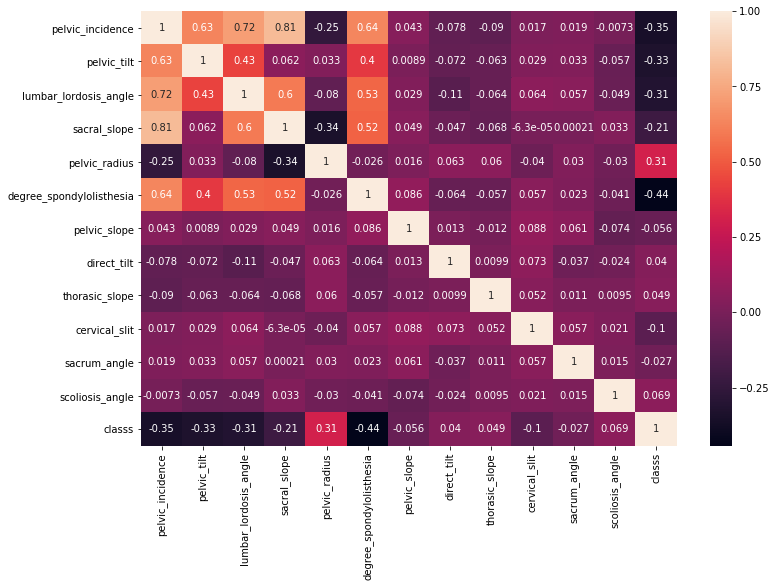

In [65]:
fig,ax= plt.subplots(figsize = (12,8))

sns.heatmap(spine_data_corr, annot=True)

ax.set_ylim(sorted(ax.get_xlim(),reverse=True))

plt.show()

In [66]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('classs',axis=1)
Y = spine_data['classs']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state = RANDOM_SEED)

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,),
                       max_iter=100,
                       activation='relu',
                       alpha=0.0001,
                       solver = 'lbfgs',
                       verbose=True)

Instantiate the MLPClassifier and specify the hyper parameters you want for your neural network model. Here are specified exactly 1 hidden layer with 10 neurons. 


We'll run training for the maximum of 100 iterations, and the activation function that we have specified here is ReLU activation. 


In addition to ReLU activation, we've seen that the multi-layer perceptron in scikit-learn supports logistic activation. It also supports tanh activation and the activation that was just the identity function. That's when you have a linear neuron. 


The alpha parameter, which controls the regularization of a neural network, are set to 0.0001. And since our dataset is fairly small, we'll use the lbfgs optimizer to train this model. 


We are now ready to train our neural network, which we can do by simply calling fit on the training data. The classification model built using scikit-learn MLPClassifier trains by default using the cross entropy loss function. Once the model has completed training on our dataset, we can use this MLPClassifier for predictions. 


In [69]:
mlp_clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [70]:
y_pred = mlp_clf.predict(x_test)

In [71]:
pred_results = pd.DataFrame({'y_test':y_test,
                           'y_pred':y_pred})
pred_results.sample(10)

,y_test,y_pred
53,1,0
222,0,0
184,0,0
102,1,0
170,0,0
277,1,0
113,0,0
61,0,0
98,0,0
265,0,0


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,y_pred)

0.6612903225806451

Using the features available our model was able to predict mostly correctly whether the spine was abnormal or not. Let's objectively evaluate this model using the accuracy_score on the test data, and you can see that the accuracy is 66%. That's not a fantastic model but not a bad one either. Our model predicted 66% of the input values correctly. 

### MODEL-II

Let's change the design of our neural network to see how performance changes. We currently have 1 hidden layer with 10 neurons. I'm going to make the neural network more complex and will use 100 neurons in this hidden layer. 

In [74]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                       max_iter=100,
                       activation='relu',
                       alpha=0.0001,
                       solver = 'lbfgs',
                       verbose=True)

mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.6612903225806451

And finally, we'll get to the accuracy score of this model, and you can see that this model didnt perform any better. 

### MODEL-III

In [75]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                       max_iter=100,
                       activation='relu',
                       alpha=0.0001,
                       solver = 'lbfgs',
                       verbose=True)

mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.6451612903225806

### MODEL-IV

change this model to have 2 hidden layers both with 100 neurons. I'm steadily making this model more complex to see if that helps, 

In [76]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100),
                       max_iter=100,
                       activation='relu',
                       alpha=0.0001,
                       solver = 'lbfgs',
                       verbose=True)

mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.7580645161290323

and it did. But we are still stuck at around 80%. 

### MODEL-V

What if I trained this model for longer and used a different regularization? I'll increase max_iter to 1000 and I've changed alpha to be 0.001.

In [77]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100),
                       max_iter=1000,
                       activation='relu',
                       alpha=0.001,
                       solver = 'lbfgs',
                       verbose=True)

mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.6612903225806451

WORSE

So I have applied stronger regularization to this model and this only made the model worse.

### MODEL-VI

change the activation function to be the logistic activation. And I'll go with 1000 iterations of training and an alpha of 0.001 and calculate the accuracy of this model on the test data, 

In [80]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                       max_iter=1000,
                       activation='logistic',
                       alpha=0.001,
                       solver = 'lbfgs',
                       verbose=True)

mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.8064516129032258

I find that this has actually improved the model.

We used logistic activation, and with longer training, our model went back up to about 80% accuracy. You can use the pd.crosstab function to view a confusion matrix of your model's results. This will give you the actual labels verses predicted labels and how many counts your model got right or wrong. The main diagonal here is all of the test instances that your model predicted correctly. 

In [83]:
pred_results = pd.DataFrame({'y_test':y_test,
                           'y_pred':y_pred})
spine_tab = pd.crosstab(pred_results.y_test,pred_results.y_pred)
spine_tab

y_pred,0,1
y_test,,
0,33,8
1,4,17


Instead of using pandas, you can use the confusion_matrix utility function that scikit-learn offers. 

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(y_test,y_pred))

[[33  8]
 [ 4 17]]


In addition, the classifications report will also give you a quick measure of how your classification model performs. Pass in y_test and y_pred into the confusion_matrix function, and this will print out the confusion matrix to screen. 

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.68      0.81      0.74        21

    accuracy                           0.81        62
   macro avg       0.79      0.81      0.79        62
weighted avg       0.82      0.81      0.81        62



The classification_report utility function will give you other measures other than accuracy that you can use to evaluate your model such as precision, recall, and f1-score. Precision is a measure of how many of the positive identifications of spine abnormality your model got right, and recall is a measure of how many of the actual spine abnormalities that exist in your dataset were correctly identified by our model.